# Capstone Project - Starting a Restaurant in Hong Kong: A Data Analysis Perspective


## Import necessary Libraries

In [55]:
import requests # library to handle requests
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## District information



Transform data (District of HK) into a data frame

In [68]:
dfa = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Hong_Kong')[5]
dfa


,District,Chinese,Population (2016)[6],Comparable Territory (2018)[7],Population Growth (From 2006)[6],Density(/km2)[6]
0,Central and Western,中西區,243266,Mayotte (France),-2.7%,19391
1,Eastern,東區,555034,Cape Verde,-2.8%,30861
2,Southern,南區,274994,French Guiana (France),-0.6%,7080
3,Wan Chai,灣仔區,180123,Saint Lucia,-0.1%,17137
4,Hong Kong Island Subtotal,Hong Kong Island Subtotal,1253417,East Timor,-1.2%,15691
5,Sham Shui Po,深水埗區,405869,Belize,+11.0%,43381
6,Kowloon City,九龍城區,418732,Brunei,+15.5%,41802
7,Kwun Tong,觀塘區,648541,Solomon Islands,+10.4%,57530
8,Wong Tai Sin,黃大仙區,425235,Brunei,+0.4%,45711
9,Yau Tsim Mong,油尖旺區,342970,Iceland,+22.3%,49046


In [69]:
dfb = pd.read_html(io="https://en.wikipedia.org/wiki/Districts_of_Hong_Kong",header=0, na_values=['Not assigned'])[6]
dfb

,District,Region,Chinese,Area(km2),Comparable Territory
0,Central and Western,Hong Kong Island,中西區,12.44,Tokelau (New Zealand)
1,Eastern,Hong Kong Island,東區,18.56,Nauru
2,Southern,Hong Kong Island,南區,38.85,Norfolk Island (Australia)
3,Wan Chai,Hong Kong Island,灣仔區,9.83,Tokelau (New Zealand)
4,Sham Shui Po,Kowloon,深水埗區,9.35,Tokelau (New Zealand)
5,Kowloon City,Kowloon,九龍城區,10.02,Tokelau (New Zealand)
6,Kwun Tong,Kowloon,觀塘區,11.27,Tokelau (New Zealand)
7,Wong Tai Sin,Kowloon,黃大仙區,9.30,Tokelau (New Zealand)
8,Yau Tsim Mong,Kowloon,油尖旺區,6.99,Gibraltar (United Kingdom)
9,Islands,New Territories,離島區,175.12,Aruba (Netherlands)


Organize and combine the data into one dataframe

In [70]:
dfa.drop("Chinese", axis=1, inplace=True)
dfa.drop("Comparable Territory (2018)[7]", axis=1, inplace=True)
dfa.drop("Population Growth (From 2006)[6]", axis=1, inplace=True)
dfa

,District,Population (2016)[6],Density(/km2)[6]
0,Central and Western,243266,19391
1,Eastern,555034,30861
2,Southern,274994,7080
3,Wan Chai,180123,17137
4,Hong Kong Island Subtotal,1253417,15691
5,Sham Shui Po,405869,43381
6,Kowloon City,418732,41802
7,Kwun Tong,648541,57530
8,Wong Tai Sin,425235,45711
9,Yau Tsim Mong,342970,49046


In [36]:
dfb.drop("Chinese", axis=1, inplace=True)
dfb.drop("Comparable Territory", axis=1, inplace=True)
dfb

,District,Region,Area(km2)
0,Central and Western,Hong Kong Island,12.44
1,Eastern,Hong Kong Island,18.56
2,Southern,Hong Kong Island,38.85
3,Wan Chai,Hong Kong Island,9.83
4,Sham Shui Po,Kowloon,9.35
5,Kowloon City,Kowloon,10.02
6,Kwun Tong,Kowloon,11.27
7,Wong Tai Sin,Kowloon,9.30
8,Yau Tsim Mong,Kowloon,6.99
9,Islands,New Territories,175.12


In [71]:
dfc = pd.merge(dfa, dfb,how='left', on='District')
dfc

,District,Population (2016)[6],Density(/km2)[6],Region,Chinese,Area(km2),Comparable Territory
0,Central and Western,243266,19391,Hong Kong Island,中西區,12.44,Tokelau (New Zealand)
1,Eastern,555034,30861,Hong Kong Island,東區,18.56,Nauru
2,Southern,274994,7080,Hong Kong Island,南區,38.85,Norfolk Island (Australia)
3,Wan Chai,180123,17137,Hong Kong Island,灣仔區,9.83,Tokelau (New Zealand)
4,Hong Kong Island Subtotal,1253417,15691,NaN,NaN,NaN,NaN
5,Sham Shui Po,405869,43381,Kowloon,深水埗區,9.35,Tokelau (New Zealand)
6,Kowloon City,418732,41802,Kowloon,九龍城區,10.02,Tokelau (New Zealand)
7,Kwun Tong,648541,57530,Kowloon,觀塘區,11.27,Tokelau (New Zealand)
8,Wong Tai Sin,425235,45711,Kowloon,黃大仙區,9.30,Tokelau (New Zealand)
9,Yau Tsim Mong,342970,49046,Kowloon,油尖旺區,6.99,Gibraltar (United Kingdom)


In [51]:
dfc = dfc.drop([4,10,20,21], axis=0)
dfc

,District,Population (2016)[6],Density(/km2)[6],Region,Area(km2)
0,Central and Western,243266,19391,Hong Kong Island,12.44
1,Eastern,555034,30861,Hong Kong Island,18.56
2,Southern,274994,7080,Hong Kong Island,38.85
3,Wan Chai,180123,17137,Hong Kong Island,9.83
5,Sham Shui Po,405869,43381,Kowloon,9.35
6,Kowloon City,418732,41802,Kowloon,10.02
7,Kwun Tong,648541,57530,Kowloon,11.27
8,Wong Tai Sin,425235,45711,Kowloon,9.30
9,Yau Tsim Mong,342970,49046,Kowloon,6.99
11,Islands,156801,886,New Territories,175.12


In [74]:
dfc = dfc.rename(columns={"Population (2016)[6]": "Population"})
dfc = dfc.rename(columns={"Density(/km2)[6]": "Density(/km2)"})
dfc = dfc.drop([4,10,20,21], axis=0)
dfc


,District,Population,Density(/km2),Region,Chinese,Area(km2),Comparable Territory
0,Central and Western,243266,19391,Hong Kong Island,中西區,12.44,Tokelau (New Zealand)
1,Eastern,555034,30861,Hong Kong Island,東區,18.56,Nauru
2,Southern,274994,7080,Hong Kong Island,南區,38.85,Norfolk Island (Australia)
3,Wan Chai,180123,17137,Hong Kong Island,灣仔區,9.83,Tokelau (New Zealand)
5,Sham Shui Po,405869,43381,Kowloon,深水埗區,9.35,Tokelau (New Zealand)
6,Kowloon City,418732,41802,Kowloon,九龍城區,10.02,Tokelau (New Zealand)
7,Kwun Tong,648541,57530,Kowloon,觀塘區,11.27,Tokelau (New Zealand)
8,Wong Tai Sin,425235,45711,Kowloon,黃大仙區,9.30,Tokelau (New Zealand)
9,Yau Tsim Mong,342970,49046,Kowloon,油尖旺區,6.99,Gibraltar (United Kingdom)
11,Islands,156801,886,New Territories,離島區,175.12,Aruba (Netherlands)


In [75]:
dfc["District"].replace({"Eastern": "Eastern, Hong Kong", "Southern": "Southern, Hong Kong", "Islands": "Islands, Hong Kong", "North": "North, Hong Kong"}, inplace=True)

In [76]:
dfc["District"].replace({"Eastern, Hong Kong": "Eastern District", "Southern": "Southern District", "Islands, Hong Kong": "Islands District", "North, Hong Kong": "North District"}, inplace=True)

## Import Geospatial Data

In [77]:
geolocator = Nominatim(user_agent="HK")
dfc['Major_Dist_Coord']= dfc['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
dfc[['Latitude', 'Longitude']] = dfc['Major_Dist_Coord'].apply(pd.Series)
dfc.drop(['Major_Dist_Coord'], axis=1, inplace=True)
dfc

,District,Population,Density(/km2),Region,Chinese,Area(km2),Comparable Territory,Latitude,Longitude
0,Central and Western,243266,19391,Hong Kong Island,中西區,12.44,Tokelau (New Zealand),22.281938,114.158076
1,Eastern District,555034,30861,Hong Kong Island,東區,18.56,Nauru,22.273078,114.233594
2,"Southern, Hong Kong",274994,7080,Hong Kong Island,南區,38.85,Norfolk Island (Australia),60.185615,24.922397
3,Wan Chai,180123,17137,Hong Kong Island,灣仔區,9.83,Tokelau (New Zealand),22.279015,114.172483
5,Sham Shui Po,405869,43381,Kowloon,深水埗區,9.35,Tokelau (New Zealand),22.328190,114.160854
6,Kowloon City,418732,41802,Kowloon,九龍城區,10.02,Tokelau (New Zealand),22.330160,114.189937
7,Kwun Tong,648541,57530,Kowloon,觀塘區,11.27,Tokelau (New Zealand),22.312937,114.225610
8,Wong Tai Sin,425235,45711,Kowloon,黃大仙區,9.30,Tokelau (New Zealand),22.341654,114.193859
9,Yau Tsim Mong,342970,49046,Kowloon,油尖旺區,6.99,Gibraltar (United Kingdom),22.307404,114.165526
11,Islands District,156801,886,New Territories,離島區,175.12,Aruba (Netherlands),22.230076,113.986785


In [61]:
address = 'Hong Kong'
geolocator = Nominatim(user_agent="HK")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_hk = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(dfc['Latitude'], dfc['Longitude'], dfc['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk) 
    
map_hk




## Restaurants in Hong Kong

In [8]:
import requests
from pandas.io.json import json_normalize
results = requests.get(url).json()

CLIENT_ID = 'O1Z0F0LVNQJ0TVXUH4HMXV15BRCATJUFDST3VTBG4QL1OIIT' # your Foursquare ID
CLIENT_SECRET = 'NCNEX3OHTDQLHYCYGLDMANYUWEGA5OWIWN5LOWTLUPAYXVFP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: O1Z0F0LVNQJ0TVXUH4HMXV15BRCATJUFDST3VTBG4QL1OIIT
CLIENT_SECRET:NCNEX3OHTDQLHYCYGLDMANYUWEGA5OWIWN5LOWTLUPAYXVFP


In [10]:
from geopy.geocoders import Nominatim 
address = 'Hong Kong'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

22.350627 114.1849161


In [32]:
search_query = 'Restaurant'
radius = 50000000000
print(search_query + ' .... OK!')

Restaurant .... OK!


In [33]:
url = 'https://api.foursquare.com/v2/venues/search?client_id=O1Z0F0LVNQJ0TVXUH4HMXV15BRCATJUFDST3VTBG4QL1OIIT&client_secret=NCNEX3OHTDQLHYCYGLDMANYUWEGA5OWIWN5LOWTLUPAYXVFP&ll=22.350627,114.1849161&v=20180604&query=Restaurant&radius=50000000000&limit=50000'
url

'https://api.foursquare.com/v2/venues/search?client_id=O1Z0F0LVNQJ0TVXUH4HMXV15BRCATJUFDST3VTBG4QL1OIIT&client_secret=NCNEX3OHTDQLHYCYGLDMANYUWEGA5OWIWN5LOWTLUPAYXVFP&ll=22.350627,114.1849161&v=20180604&query=Restaurant&radius=50000000000&limit=50000'

In [34]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fa43521349fac215843d15e'},
 'response': {'venues': [{'id': '5a3df5e595a7224a1feb57de',
    'name': 'Star Seafood and Roasted Goose Restaurant (明星海鮮燒鵝專門店)',
    'location': {'address': 'Shop 301 & 302, 3/F, Chuk Yuen Plaza',
     'lat': 22.344576,
     'lng': 114.19353,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.344576,
       'lng': 114.19353}],
     'distance': 1113,
     'cc': 'HK',
     'neighborhood': 'Wong Tai Sin',
     'city': 'Wong Tai Sin',
     'state': 'Kowloon',
     'country': '香港',
     'formattedAddress': ['Shop 301 & 302, 3/F, Chuk Yuen Plaza',
      'Kowloon',
      '香港']},
    'categories': [{'id': '52af3a7c3cf9994f4e043bed',
      'name': 'Cantonese Restaurant',
      'pluralName': 'Cantonese Restaurants',
      'shortName': 'Cantonese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1604597025',
    'hasPerk

In [35]:

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress
0,5a3df5e595a7224a1feb57de,Star Seafood and Roasted Goose Restaurant (明星海...,"[{'id': '52af3a7c3cf9994f4e043bed', 'name': 'C...",v-1604597025,False,"Shop 301 & 302, 3/F, Chuk Yuen Plaza",22.344576,114.193530,"[{'label': 'display', 'lat': 22.344576, 'lng':...",1113,HK,Wong Tai Sin,Wong Tai Sin,Kowloon,香港,"[Shop 301 & 302, 3/F, Chuk Yuen Plaza, Kowloon..."
1,4d0f497fb765224b2ad4e332,Rich Fort Restaurant (富堡茶餐廳),"[{'id': '58daa1558bbb0b01f18ec1d3', 'name': 'C...",v-1604597025,False,"G/F, 3 Ngan Fung St, Fung Wong Sun Chuen, Wong...",22.344145,114.197881,"[{'label': 'display', 'lat': 22.344145, 'lng':...",1517,HK,NaN,香港,NaN,香港,"[G/F, 3 Ngan Fung St, Fung Wong Sun Chuen, Won..."
2,4ba46422f964a5205d9a38e3,Renfrew Restaurant (聯福樓),"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1604597025,False,"2/F, David C. Lam Bldg, Hong Kong Baptist Univ...",22.337303,114.182186,"[{'label': 'display', 'lat': 22.33730337963130...",1509,HK,NaN,九龙塘,NaN,香港,"[2/F, David C. Lam Bldg, Hong Kong Baptist Uni..."
3,5cd2ba21fc9e94002cb9e514,Wing Kee Restaurant (榮記茶餐室),"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1604597025,False,"Shop A & B, G/F, 12 Yuk Wah Crescent",22.346448,114.202141,"[{'label': 'display', 'lat': 22.34644796068556...",1833,HK,NaN,Tsz Wan Shan,Kowloon,香港,"[Shop A & B, G/F, 12 Yuk Wah Crescent, Kowloon..."
4,5235a19611d2eedd1f8243ec,Good Idea Restaurant (好主意餐廳),"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1604597025,False,5 Kam Fung St,22.345009,114.197805,"[{'label': 'display', 'lat': 22.345009, 'lng':...",1466,HK,NaN,Wong Tai Sin,Wong Tai Sin,香港,"[5 Kam Fung St, Wong Tai Sin, 香港]"


In [23]:

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,neighborhood,city,state,country,formattedAddress,id
0,Star Seafood and Roasted Goose Restaurant (明星海...,Cantonese Restaurant,"Shop 301 & 302, 3/F, Chuk Yuen Plaza",22.344576,114.193530,"[{'label': 'display', 'lat': 22.344576, 'lng':...",1113,HK,Wong Tai Sin,Wong Tai Sin,Kowloon,香港,"[Shop 301 & 302, 3/F, Chuk Yuen Plaza, Kowloon...",5a3df5e595a7224a1feb57de
1,Rich Fort Restaurant (富堡茶餐廳),Cha Chaan Teng,"G/F, 3 Ngan Fung St, Fung Wong Sun Chuen, Wong...",22.344145,114.197881,"[{'label': 'display', 'lat': 22.344145, 'lng':...",1517,HK,NaN,香港,NaN,香港,"[G/F, 3 Ngan Fung St, Fung Wong Sun Chuen, Won...",4d0f497fb765224b2ad4e332
2,Renfrew Restaurant (聯福樓),Chinese Restaurant,"2/F, David C. Lam Bldg, Hong Kong Baptist Univ...",22.337303,114.182186,"[{'label': 'display', 'lat': 22.33730337963130...",1509,HK,NaN,九龙塘,NaN,香港,"[2/F, David C. Lam Bldg, Hong Kong Baptist Uni...",4ba46422f964a5205d9a38e3
3,Wing Kee Restaurant (榮記茶餐室),Chinese Restaurant,"Shop A & B, G/F, 12 Yuk Wah Crescent",22.346448,114.202141,"[{'label': 'display', 'lat': 22.34644796068556...",1833,HK,NaN,Tsz Wan Shan,Kowloon,香港,"[Shop A & B, G/F, 12 Yuk Wah Crescent, Kowloon...",5cd2ba21fc9e94002cb9e514
4,Good Idea Restaurant (好主意餐廳),Chinese Restaurant,5 Kam Fung St,22.345009,114.197805,"[{'label': 'display', 'lat': 22.345009, 'lng':...",1466,HK,NaN,Wong Tai Sin,Wong Tai Sin,香港,"[5 Kam Fung St, Wong Tai Sin, 香港]",5235a19611d2eedd1f8243ec
5,Ming Garden Restaurant (名苑酒家),Cantonese Restaurant,"Shop 3110-12, 3/F, Lok Fu Shopping Centre, 198...",22.337916,114.186695,"[{'label': 'display', 'lat': 22.337916, 'lng':...",1426,HK,Wong Tai Sin,九龍,Kowloon City,香港,"[Shop 3110-12, 3/F, Lok Fu Shopping Centre, 19...",5a8910ec1ffe9730bd8a6249
6,Sam Wo Restaurant (三和茶餐廳),Cha Chaan Teng,"Food+, Lok Fu Plaza, 198 Junction Rd",22.338494,114.188048,"[{'label': 'display', 'lat': 22.33849407417858...",1388,HK,NaN,Wang Tau Hom,NaN,香港,"[Food+, Lok Fu Plaza, 198 Junction Rd, 香港]",4b457d12f964a5203f0d26e3
7,Guangdong Barbecue Restaurant (廣東燒味餐廳),Chinese Restaurant,"Shop 2, G/F, Hsin Kuang Centre, 120 Lung Cheun...",22.341926,114.196326,"[{'label': 'display', 'lat': 22.341926, 'lng':...",1522,HK,NaN,Wong Tai Sin,Wong Tai Sin,香港,"[Shop 2, G/F, Hsin Kuang Centre, 120 Lung Cheu...",52c2a51911d212c5612a2894
8,Tsui Wah Restaurant (翠華餐廳),Cha Chaan Teng,"Shop LG04 & LG07, LG/F, Temple Mall North, 136...",22.341884,114.193389,"[{'label': 'display', 'lat': 22.3418843008813,...",1306,HK,Wong Tai Sin,Wong Tai Sin,Wong Tai Sin,香港,"[Shop LG04 & LG07, LG/F, Temple Mall North, 13...",5662d0d6498e4003dfcd9347
9,Tsui Wah Restaurant (翠華餐廳),Cha Chaan Teng,"G/F, 81-83 Shung Ling St",22.334317,114.195783,"[{'label': 'display', 'lat': 22.33431713205862...",2132,HK,NaN,San Po Kong,KLN,香港,"[G/F, 81-83 Shung Ling St, KLN, 香港]",4b64ef67f964a520d9da2ae3


In [36]:

dataframe_filtered.name

0     Star Seafood and Roasted Goose Restaurant (明星海...
1                          Rich Fort Restaurant (富堡茶餐廳)
2                              Renfrew Restaurant (聯福樓)
3                           Wing Kee Restaurant (榮記茶餐室)
4                          Good Idea Restaurant (好主意餐廳)
5                         Ming Garden Restaurant (名苑酒家)
6                             Sam Wo Restaurant (三和茶餐廳)
7                Guangdong Barbecue Restaurant (廣東燒味餐廳)
8                            Tsui Wah Restaurant (翠華餐廳)
9                            Tsui Wah Restaurant (翠華餐廳)
10                   Wah Yuen Café & Restaurant (華園茶餐廳)
11           Gold Mondo Vietnamese Restaurant (金滿都越南餐廳)
12                            Sunrise Restaurant (日昇餐廳)
13                          Singapore Restaurant (星洲名廚)
14                 Visitor / Staff Restaurant (訪客／職員餐廳)
15                               Famous Restaurant 名舫酒家
16                        Kam Ka Lok Restaurant (金家樂餐廳)
17                   Lung Jie Thai Restaurant (隆

In [38]:
import requests # library to handle requests
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Folium installed')
print('Libraries imported.')

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent Hing Kong
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Hong Kong',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Folium installed
Libraries imported.


## Cluster Neighborhoods in HK

In [133]:

def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id=O1Z0F0LVNQJ0TVXUH4HMXV15BRCATJUFDST3VTBG4QL1OIIT&client_secret=NCNEX3OHTDQLHYCYGLDMANYUWEGA5OWIWN5LOWTLUPAYXVFP&v=20180604&ll=22.350627,114.1849161&radius=50000&limit=1000'
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [134]:
HK1_venues = getNearbyVenues(names=dfc['District'],
                                   latitudes=dfc['Latitude'],
                                   longitudes=dfc['Longitude']
                                  )

Central and Western
Eastern District
Southern, Hong Kong
Wan Chai
Sham Shui Po
Kowloon City
Kwun Tong
Wong Tai Sin
Yau Tsim Mong
Islands District
Kwai Tsing
North District
Sai Kung
Sha Tin
Tai Po
Tsuen Wan
Tuen Mun
Yuen Long


In [142]:

print (HK1_venues['Venue Category'].value_counts())


Hotel                            342
Park                             180
Japanese Restaurant               90
Café                              72
Coffee Shop                       72
Mountain                          72
Electronics Store                 54
Scenic Lookout                    36
Yoga Studio                       36
Italian Restaurant                36
Thai Restaurant                   36
Shopping Mall                     36
Dumpling Restaurant               36
Beer Store                        18
Arts & Crafts Store               18
Bakery                            18
Clothing Store                    18
Beer Bar                          18
Waterfront                        18
Seafood Restaurant                18
Market                            18
Bookstore                         18
Steakhouse                        18
Gym / Fitness Center              18
Supermarket                       18
Whisky Bar                        18
Scandinavian Restaurant           18
V

In [143]:
HK_Venues_only_restaurant = HK1_venues[HK1_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
HK_Venues_only_restaurant.index = np.arange(1, len(HK_Venues_only_restaurant )+1)

In [144]:
print (HK_Venues_only_restaurant['Venue Category'].value_counts())

Japanese Restaurant              90
Thai Restaurant                  36
Dumpling Restaurant              36
Italian Restaurant               36
Soba Restaurant                  18
Vegetarian / Vegan Restaurant    18
Pakistani Restaurant             18
Scandinavian Restaurant          18
Chinese Restaurant               18
Tapas Restaurant                 18
Seafood Restaurant               18
Name: Venue Category, dtype: int64


In [154]:
HK_Venues_only_restaurant1 = HK_Venues_only_restaurant['Venue Category'].value_counts()[0:12].to_frame(name='frequency')
HK_Venues_only_restaurant1 = HK_Venues_only_restaurant1.reset_index()
HK_Venues_only_restaurant1.rename(index=str, columns={"index": "type"}, inplace=True)
HK_Venues_only_restaurant1 

,type,frequency
0,Japanese Restaurant,90
1,Thai Restaurant,36
2,Dumpling Restaurant,36
3,Italian Restaurant,36
4,Soba Restaurant,18
5,Vegetarian / Vegan Restaurant,18
6,Pakistani Restaurant,18
7,Scandinavian Restaurant,18
8,Chinese Restaurant,18
9,Tapas Restaurant,18


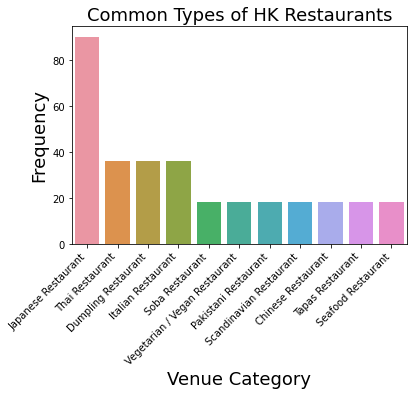

<Figure size 1296x504 with 0 Axes>

In [187]:
import seaborn as sns
from matplotlib import pyplot as plt
s=sns.barplot(x="type", y="frequency", data=HK_Venues_only_restaurant1)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Common Types of HK Restaurants', fontsize=18)
plt.xlabel("Venue Category", fontsize=18)
plt.ylabel ("Frequency", fontsize=18)
plt.savefig("hkr.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [160]:
HK_Venues_only_restaurant.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Central and Western,22.281938,114.158076,Samsen (泰館),22.285082,114.152286,Thai Restaurant
2,Central and Western,22.281938,114.158076,Samsen (泰麵),22.274023,114.174000,Thai Restaurant
3,Central and Western,22.281938,114.158076,Farmer's Cooking,22.288759,114.210737,Vegetarian / Vegan Restaurant
4,Central and Western,22.281938,114.158076,Yardbird,22.287076,114.149177,Japanese Restaurant
5,Central and Western,22.281938,114.158076,Din Tai Fung (鼎泰豐),22.297600,114.169382,Dumpling Restaurant
6,Central and Western,22.281938,114.158076,Japanese Restaurant Doraya (定食Doraya),22.299643,114.174290,Japanese Restaurant
7,Central and Western,22.281938,114.158076,New Punjab Club,22.280250,114.155475,Pakistani Restaurant
8,Central and Western,22.281938,114.158076,Frantzén's Kitchen by Björn Frantzén,22.284808,114.148220,Scandinavian Restaurant
9,Central and Western,22.281938,114.158076,Okra Hong Kong,22.286108,114.146104,Japanese Restaurant
10,Central and Western,22.281938,114.158076,Pici,22.276117,114.168987,Italian Restaurant


In [161]:
HK_Venues_restaurant = HK_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [162]:
HK_Venues_restaurant

Neighborhood
Central and Western    18
Eastern District       18
Islands District       18
Kowloon City           18
Kwai Tsing             18
Kwun Tong              18
North District         18
Sai Kung               18
Sha Tin                18
Sham Shui Po           18
Southern, Hong Kong    18
Tai Po                 18
Tsuen Wan              18
Tuen Mun               18
Wan Chai               18
Wong Tai Sin           18
Yau Tsim Mong          18
Yuen Long              18
Name: Venue Category, dtype: int64

In [168]:
HK_Venues_restaurant_df  = HK_Venues_restaurant.to_frame().reset_index()
HK_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
HK_Venues_restaurant_df.index = np.arange(1, len(HK_Venues_restaurant_df)+1)
list_rest_no =HK_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =HK_Venues_restaurant_df['Neighborhood'].to_list()

# one hot encoding
HK_onehot = pd.get_dummies(HK_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HK_onehot['Neighborhood'] = HK_Venues_only_restaurant['Neighborhood'] 
HK_onehot

,Chinese Restaurant,Dumpling Restaurant,Italian Restaurant,Japanese Restaurant,Pakistani Restaurant,Scandinavian Restaurant,Seafood Restaurant,Soba Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Neighborhood
1,0,0,0,0,0,0,0,0,0,1,0,Central and Western
2,0,0,0,0,0,0,0,0,0,1,0,Central and Western
3,0,0,0,0,0,0,0,0,0,0,1,Central and Western
4,0,0,0,1,0,0,0,0,0,0,0,Central and Western
5,0,1,0,0,0,0,0,0,0,0,0,Central and Western
6,0,0,0,1,0,0,0,0,0,0,0,Central and Western
7,0,0,0,0,1,0,0,0,0,0,0,Central and Western
8,0,0,0,0,0,1,0,0,0,0,0,Central and Western
9,0,0,0,1,0,0,0,0,0,0,0,Central and Western
10,0,0,1,0,0,0,0,0,0,0,0,Central and Western


In [169]:
HK_grouped = HK_onehot.groupby('Neighborhood').mean().reset_index()
HK_grouped

,Neighborhood,Chinese Restaurant,Dumpling Restaurant,Italian Restaurant,Japanese Restaurant,Pakistani Restaurant,Scandinavian Restaurant,Seafood Restaurant,Soba Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Central and Western,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556
1,Eastern District,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556
2,Islands District,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556
3,Kowloon City,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556
4,Kwai Tsing,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556
5,Kwun Tong,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556
6,North District,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556
7,Sai Kung,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556
8,Sha Tin,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556
9,Sham Shui Po,0.055556,0.111111,0.111111,0.277778,0.055556,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556


In [171]:
num_top_venues = 5

for hood in HK_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = HK_grouped[HK_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central and Western----
                 venue  freq
0  Japanese Restaurant  0.28
1  Dumpling Restaurant  0.11
2   Italian Restaurant  0.11
3      Thai Restaurant  0.11
4   Chinese Restaurant  0.06


----Eastern District----
                 venue  freq
0  Japanese Restaurant  0.28
1  Dumpling Restaurant  0.11
2   Italian Restaurant  0.11
3      Thai Restaurant  0.11
4   Chinese Restaurant  0.06


----Islands District----
                 venue  freq
0  Japanese Restaurant  0.28
1  Dumpling Restaurant  0.11
2   Italian Restaurant  0.11
3      Thai Restaurant  0.11
4   Chinese Restaurant  0.06


----Kowloon City----
                 venue  freq
0  Japanese Restaurant  0.28
1  Dumpling Restaurant  0.11
2   Italian Restaurant  0.11
3      Thai Restaurant  0.11
4   Chinese Restaurant  0.06


----Kwai Tsing----
                 venue  freq
0  Japanese Restaurant  0.28
1  Dumpling Restaurant  0.11
2   Italian Restaurant  0.11
3      Thai Restaurant  0.11
4   Chinese Restaurant  0.06


--

In [172]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [174]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = HK_grouped['Neighborhood']

for ind in np.arange(HK_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HK_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
1,Eastern District,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
2,Islands District,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
3,Kowloon City,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
4,Kwai Tsing,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
5,Kwun Tong,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
6,North District,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
7,Sai Kung,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
8,Sha Tin,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
9,Sham Shui Po,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant


In [175]:
# set number of clusters
kclusters = 5
HK_grouped_clustering = HK_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HK_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [181]:


HK_merged = dfc

HK_merged.rename(columns={'Name':'District'}, inplace=True)

HK_merged = HK_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District')

HK_merged.head()

,District,Population,Density(/km2),Region,Chinese,Area(km2),Comparable Territory,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,243266,19391,Hong Kong Island,中西區,12.44,Tokelau (New Zealand),22.281938,114.158076,0,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
1,Eastern District,555034,30861,Hong Kong Island,東區,18.56,Nauru,22.273078,114.233594,0,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
2,"Southern, Hong Kong",274994,7080,Hong Kong Island,南區,38.85,Norfolk Island (Australia),60.185615,24.922397,0,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
3,Wan Chai,180123,17137,Hong Kong Island,灣仔區,9.83,Tokelau (New Zealand),22.279015,114.172483,0,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant
5,Sham Shui Po,405869,43381,Kowloon,深水埗區,9.35,Tokelau (New Zealand),22.328190,114.160854,0,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Soba Restaurant,Seafood Restaurant,Scandinavian Restaurant,Pakistani Restaurant


In [186]:
# create map
HKmap_restaurant = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
for lat, lon, poi, cluster in zip(HK_merged['Latitude'], 
                                  HK_merged['Longitude'], 
                                  HK_merged['District'], 
                                  HK_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(HKmap_restaurant)
       
HKmap_restaurant